100%|██████████| 170498071/170498071 [00:55<00:00, 3094167.64it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000,)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000,)


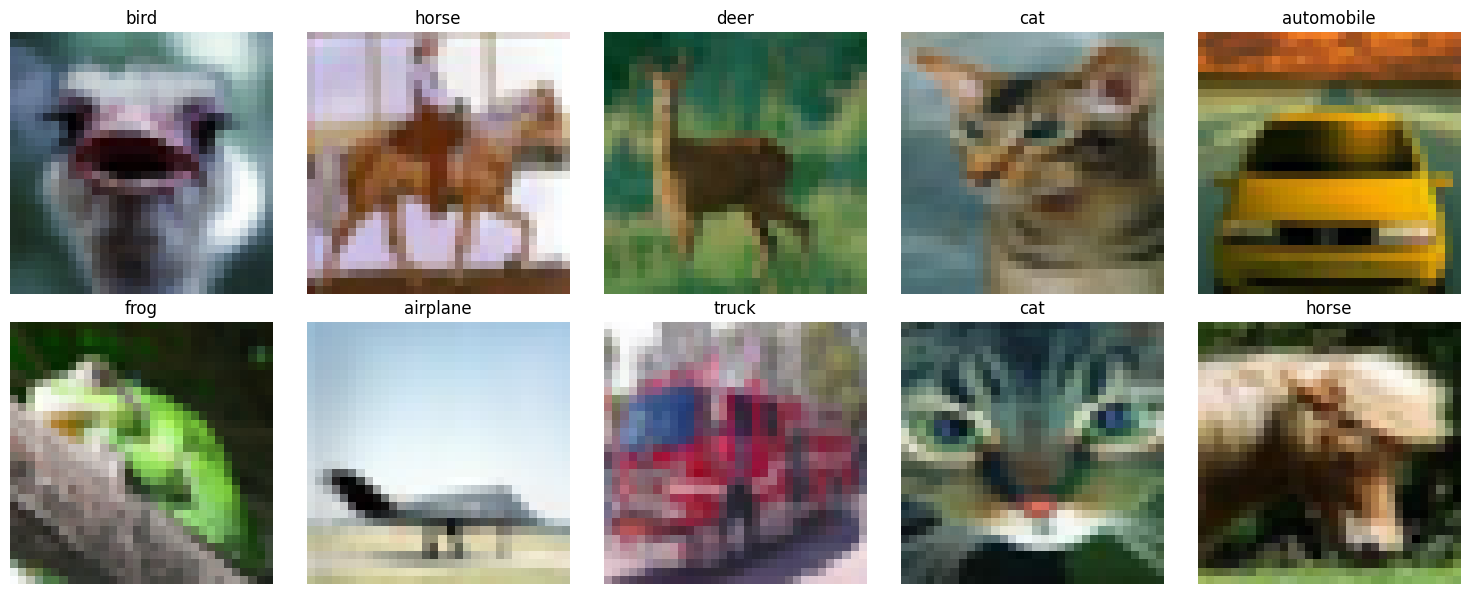

Experiment 1: Default Hyperparameters
-------------------------------------


/Users/san./Documents/GitHub/SLM/.conda/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - loss: 3.9074 - sparse_categorical_accuracy: 0.1887 - val_loss: 1.6324 - val_sparse_categorical_accuracy: 0.4100
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 44s 35ms/step - loss: 1.5656 - sparse_categorical_accuracy: 0.4316 - val_loss: 1.4186 - val_sparse_categorical_accuracy: 0.4851
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 45s 36ms/step - loss: 1.3456 - sparse_categorical_accuracy: 0.5197 - val_loss: 1.0475 - val_sparse_categorical_accuracy: 0.6240
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 43s 35ms/step - loss: 1.1874 - sparse_categorical_accuracy: 0.5837 - val_loss: 1.0347 - val_sparse_categorical_accuracy: 0.6441
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 43s 34ms/step - loss: 1.1017 - sparse_categorical_accuracy: 0.6125 - val_loss: 0.9872 - val_sparse_categorical_accuracy: 0.6555
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 44s 35ms/step - loss: 1.0355 - sparse_categorical_accuracy: 0.6390 - val_loss: 0.9360 - val_sparse_categoric

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms
from model_utils import build_model, train_model, evaluate_model
from sklearn.model_selection import train_test_split
# testing


# Constants
BATCH_SIZE = 32
EPOCHS = 10
VAL_SIZE = 0.2
RANDOM_STATE = 42

# Load the CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Convert data to numpy arrays
train_data = trainset.data
train_labels = np.array(trainset.targets)
test_data = testset.data
test_labels = np.array(testset.targets)

# Explore the dataset
print(f"Training data shape: {train_data.shape}")
print(f"Training labels shape: {train_labels.shape}")
print(f"Test data shape: {test_data.shape}")
print(f"Test labels shape: {test_labels.shape}")

# Visualize some sample images
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

fig, axs = plt.subplots(2, 5, figsize=(15, 6))
for i in range(2):
    for j in range(5):
        idx = np.random.randint(train_data.shape[0])
        axs[i, j].imshow(train_data[idx])
        axs[i, j].set_title(f"{class_names[train_labels[idx]]}")
        axs[i, j].axis('off')
plt.tight_layout()
plt.show()

# Experiment 1: Train and evaluate the model with default hyperparameters
print("Experiment 1: Default Hyperparameters")
print("-------------------------------------")

# Split the data into training and validation sets
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=VAL_SIZE, random_state=RANDOM_STATE)

# Build the model
input_shape = train_data.shape[1:]
num_classes = len(set(train_labels))
model = build_model(input_shape, num_classes)

# Train the model
model = train_model(model, train_data, train_labels, val_data, val_labels, epochs=EPOCHS, batch_size=BATCH_SIZE)

# Evaluate the model on the test set
print("Test Set Evaluation:")
evaluate_model(model, test_data, test_labels)

# Experiment 2: Train and evaluate the model with increased epochs
print("\nExperiment 2: Increased Epochs")
print("------------------------------")

# Build the model
model = build_model(input_shape, num_classes)

# Train the model with increased epochs
model = train_model(model, train_data, train_labels, val_data, val_labels, epochs=EPOCHS*2, batch_size=BATCH_SIZE)

# Evaluate the model on the test set
print("Test Set Evaluation:")
evaluate_model(model, test_data, test_labels)

# Experiment 3: Train and evaluate the model with different batch size
print("\nExperiment 3: Different Batch Size")
print("----------------------------------")

# Build the model
model = build_model(input_shape, num_classes)

# Train the model with different batch size
model = train_model(model, train_data, train_labels, val_data, val_labels, epochs=EPOCHS, batch_size=BATCH_SIZE*2)

# Evaluate the model on the test set
print("Test Set Evaluation:")
evaluate_model(model, test_data, test_labels)

